# Analyze PHMSA [legislation](https://www.federalregister.gov/documents/search?conditions%5Bagencies%5D%5B%5D=pipeline-and-hazardous-materials-safety-administration ) over time

In [1]:
import pandas as pd

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df_raw = pd.read_csv('../data/source/documents_from_pipeline_and_hazardous_materials_safety_administration.csv')
df_raw.head(3)

,title,type,agency_names,abstract,citation,document_number,html_url,pdf_url,publication_date
0,Administrative Rulemaking-Criminal Referrals,Rule,Transportation Department; Pipeline and Hazard...,PHMSA is incorporating within its regulations ...,87 FR 28779,2022-09740,https://www.federalregister.gov/documents/2022...,https://www.govinfo.gov/content/pkg/FR-2022-05...,05/11/2022
1,Pipeline Safety: Information Collection Activi...,Notice,Transportation Department; Pipeline and Hazard...,In compliance with the Paperwork Reduction Act...,87 FR 28864,2022-10119,https://www.federalregister.gov/documents/2022...,https://www.govinfo.gov/content/pkg/FR-2022-05...,05/11/2022
2,Pipeline Safety: Safety of Gas Gathering Pipel...,Rule,Transportation Department; Pipeline and Hazard...,"PHMSA is alerting the public to its April 1, 2...",87 FR 26296,2022-09474,https://www.federalregister.gov/documents/2022...,https://www.govinfo.gov/content/pkg/FR-2022-05...,05/04/2022


In [3]:
df_raw.type.value_counts()

Notice           808
Rule             115
Proposed Rule     77
Name: type, dtype: int64

In [4]:
df_raw['publication_date_dt'] = pd.to_datetime(df_raw['publication_date'], format='%m/%d/%Y')
df_raw.dtypes

title                          object
type                           object
agency_names                   object
abstract                       object
citation                       object
document_number                object
html_url                       object
pdf_url                        object
publication_date               object
publication_date_dt    datetime64[ns]
dtype: object

In [5]:
# filter out notices
df = df_raw[df_raw.type!='Notice']

In [6]:
df.publication_date_dt.dt.year.value_counts().sort_index()

2012    13
2013    33
2014    17
2015    24
2016    29
2017    11
2018    13
2019    14
2020    19
2021    15
2022     4
Name: publication_date_dt, dtype: int64

<AxesSubplot:>

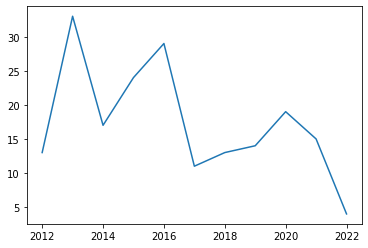

In [7]:
df.publication_date_dt.dt.year.value_counts().sort_index().plot()